## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import random
import pandas as pd


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [34]:
pip uninstall -y nlp

Found existing installation: nlp 0.4.0
Uninstalling nlp-0.4.0:
  Successfully uninstalled nlp-0.4.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install --upgrade datasets

In [36]:
from datasets import load_dataset
dataset = load_dataset('emotion')


In [ ]:
dataset

In [38]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [39]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [40]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0], labels[0]

## Task 4: Tokenizer

1. Tokenizing the tweets

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [43]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

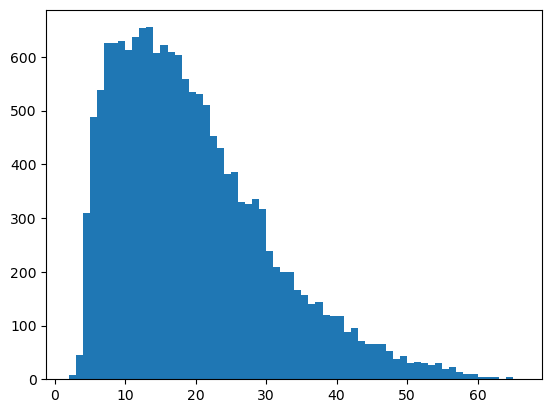

In [45]:
import matplotlib.pyplot as plt
lenghts = [len(t.split(' '))for t in tweets]
plt.hist(lenghts, bins=len(set(lenghts)))
plt.show()

In [46]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [48]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [49]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [50]:
classes = set(labels)
print(classes)
classes2 = {'anger', 'fear', 'joy', 'love', 'sadness', 'suprise'}
#print(classes)

{0, 1, 2, 3, 4, 5}


(array([4666.,    0., 5362.,    0., 1304.,    0., 2159.,    0., 1937.,
           0.,  572.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <BarContainer object of 11 artists>)

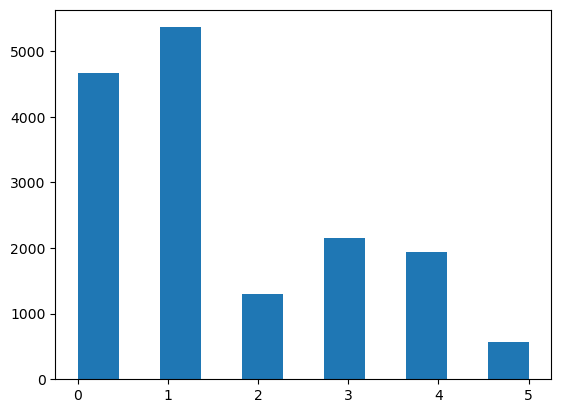

In [51]:
plt.hist(labels, bins=11)

In [52]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in classes_to_index.items())

In [53]:
classes_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [54]:
index_to_class = {0:'anger', 1:'fear', 2:'joy', 3:'love', 4:'sadness', 5:'suprise'}
print(index_to_class)

{0: 'anger', 1: 'fear', 2: 'joy', 3: 'love', 4: 'sadness', 5: 'suprise'}


In [55]:
names_to_id = lambda labels : np.array([classes_to_index.get(x) for x in labels])

In [56]:
train_lables = names_to_id(labels)
print(train_lables[2])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [60]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(

              loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
)

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_4 (Bidirecti  (None, 50, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [62]:
val_tweets, vals_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
vals_labels = names_to_id(vals_labels)

In [63]:
val_tweets[0], vals_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [ ]:
h = model.fit(
    padded_train_seq, train_lables,
    validation_data= (val_seq, vals_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

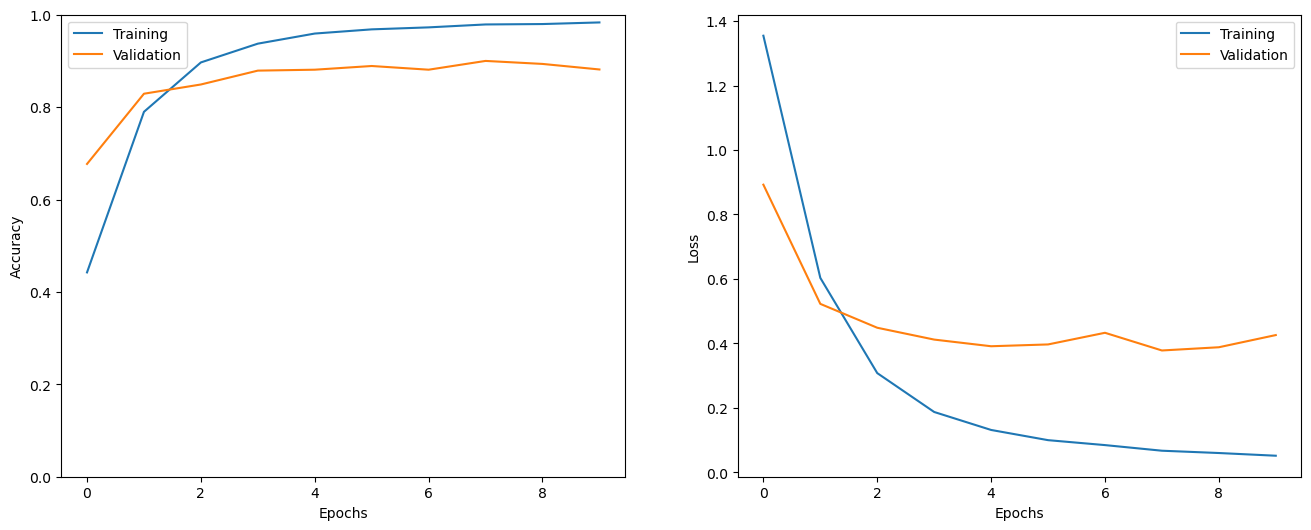

In [65]:
show_history(h)

In [66]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_id(test_labels)

In [ ]:
_ = model.evaluate(test_seq, test_labels)

In [ ]:
import random
i = random.randint(0, len(test_labels) - 1)
print('sentence :',test_tweets[i])
print('emotion : ', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]

pred_class = index_to_class[np.argmax(p)]

print('pridicted emotion : ', pred_class)

In [69]:
preds = model.predict(test_seq)

63/63 [==============================] - 1s 13ms/step


In [70]:
classes2 = {'anger', 'fear', 'joy', 'love', 'sadness', 'suprise'}

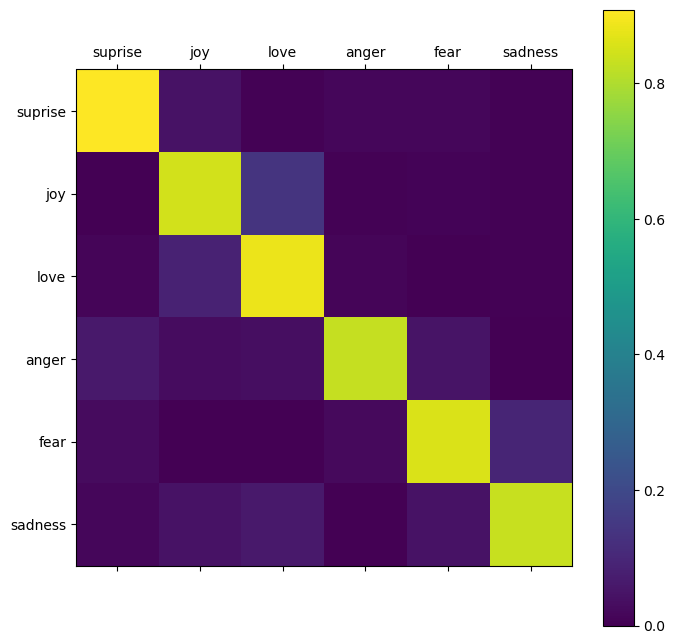

In [71]:
show_confusion_matrix(test_labels, preds.argmax(axis=1), list(classes2)) # Call the correctly defined function show_confusion_matrix